### [캐모마일 팀 프로젝트]
---


# 코로나 데이터 분석해서 때려 부수기 💊
### 팀원: 김희석, 소민경

- 링크 : https://www.kaggle.com/kimjihoo/coronavirusdataset

### 주제
###### 코로나바이러스에 대하여 데이터 분석을 통한 가설 검증 프로젝트 수행하기


### 데이터셋 설명

#### 어떻게 수집된 데이터인지, 배경 설명
- COVID-19가 한국에서 급격하게 퍼지게 되면서 수집된 데이터
- KCDC(한국질병관리센터)와 지방 정부의 보고서 자료를 기반으로 구조화 된 데이터 세트
- 정확성과 안정성을 보장하기 위해 매주 업데이트 됨

#### 어떤 정보들을 담고 있는 데이터인지 간략하게 설명 
- 총 11개의 데이터 셋으로 이루어져 있음
- 주로 감염 사례별 특징, 감염 환자 정보 및 감염 경로 등을 담고 있음(Case, PatientInfo, Patient Route)
- 네이버에 ‘감기, 독감, 폐렴, 코로나바이러스’를 검색한 추이(SearchTrend)
- 서울시 유동 인구(SeoulFloating)
- 날짜별 확진자 수
- 감염된 환자의 나이, 성별, 지역 데이터(Time, TimeAge, TimeGender, TimeProvince)
- 각 지역별 날씨 데이터(Weather)



#### 문제정의
##### 우리가 풀고 싶은 문제는 무엇인가?
- 가장 많이 전염 시킨 사람은 누구일까?
- 다른 사람을 많이 접촉 시킨 환자는 어떤 특징이 있을까?
- 감염 사례별 확진자 수는 어떻게 될까?
- 연령대별 치사율은 나이가 많을 수록 높을 것이다
- 나이대별 확진자 및 완치율은 얼마나 될까?


### 지도 데이터 커널
- https://www.kaggle.com/mbnb8317/ds4c-tutorial-all-about-folium

### Import Modules

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Load Dataset

In [2]:
patient_info = pd.read_csv("./coronavirusdataset/PatientInfo.csv")
print(patient_info.shape)
patient_info.head()

(3326, 18)


,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


## 1. 다른 사람을 가장 많이 전염시킨 사람은 누굴까?

#### (1) groupby에서 행의 개수를 세기 위해 `count` 컬럼 생성하기

In [ ]:
patient_info["count"] = 1

#### (2) `infected_by` 로 groupby 시킨 후 `sum` 으로 행의 개수 확인하기

In [ ]:
top_infection = patient_info.groupby('infected_by').sum().sort_values('count', ascending=False)
top_infection.head()

#### (3) index 새로 생성하기

In [5]:
top_infection = top_infection.reset_index()
top_infection.head()

,infected_by,patient_id,global_num,birth_year,infection_order,contact_number,count
0,2.000000e+09,102000013838,430976.0,100836.0,0.0,34.0,51
1,4.100000e+09,110700000689,0.0,53344.0,0.0,339.0,27
2,2.000000e+09,48000006440,203371.0,47361.0,0.0,0.0,24
3,4.100000e+09,86100000921,0.0,41504.0,0.0,161.0,21
4,2.000000e+09,42000008913,197481.0,40799.0,0.0,0.0,21


- index를 1부터 생성하고 싶은 경우에는 아래와 같이 직접 리스트를 만들어서 넣어주면 됨

In [6]:
# top_infection.index = np.arange(1, len(top_infection)+1)

#### (4) 실수형 데이터인 `infected_by`를 정수형으로 변환하기

In [7]:
top_infection['infected_by'] = top_infection['infected_by'].astype('int64')
top_infection.head()

,infected_by,patient_id,global_num,birth_year,infection_order,contact_number,count
0,2000000205,102000013838,430976.0,100836.0,0.0,34.0,51
1,4100000008,110700000689,0.0,53344.0,0.0,339.0,27
2,2000000167,48000006440,203371.0,47361.0,0.0,0.0,24
3,4100000006,86100000921,0.0,41504.0,0.0,161.0,21
4,2000000309,42000008913,197481.0,40799.0,0.0,0.0,21


#### (5) `top_infection`에서 필요없는 컬럼은 모두 제외하고, `infected_by`, `count` 컬럼만 가져오기

In [8]:
top_infection = top_infection[['infected_by', 'count']]

print(top_infection.shape)
top_infection.head()

(339, 2)


,infected_by,count
0,2000000205,51
1,4100000008,27
2,2000000167,24
3,4100000006,21
4,2000000309,21


#### (6) `top_infection`의 `infected_by`와 `patient_info`의 `patient_id`를 key로 합치기
- Pandas에서 제공하는 `merge` 함수를 활용합니다.
- `patient_info` 데이터프레임과 `top_infection` 데이터프레임을 merge 하면서,
- `patient_info`에서는 `patient_id`를 key로 활용하고,
- `top_infection`에서는 `infected_by`를 key로 활용하기 때문에 각각을 `left_on`, `right_on`의 인자로 넣어줍니다.

In [9]:
merged = pd.merge(patient_info, top_infection, left_on='patient_id', right_on='infected_by')
merged.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,...,infected_by_x,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,count_x,infected_by_y,count_y
0,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released,1,1000000002,1
1,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,...,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released,1,1000000003,4
2,1000000013,29.0,male,1938.0,80s,Korea,Seoul,Jongno-gu,NaN,contact with patient,...,1.000000e+09,117.0,NaN,2020-02-16,NaN,NaN,released,1,1000000013,1
3,1000000014,30.0,female,1952.0,60s,Korea,Seoul,Jongno-gu,NaN,contact with patient,...,1.000000e+09,27.0,2020-02-06,2020-02-16,2020-03-12,NaN,released,1,1000000014,1
4,1000000015,40.0,male,1943.0,70s,Korea,Seoul,Seongdong-gu,NaN,Seongdong-gu APT,...,NaN,8.0,2020-02-11,2020-02-19,NaN,NaN,isolated,1,1000000015,1


- 확인해보면 맨 오른쪽에 `count_y`라는 이름으로 `top_infection`에서의 `count`값이 `patient_id` 에 알맞게 잘 들어간 것을 확인할 수 있습니다.

#### (7) 필요한 컬럼만 추리기
- `contact_number` (접촉한 사람의 수)와 `count_y` (감염시킨 사람의 수) 의 관계를 보고싶으므로 이들만 남겨줍니다.

In [10]:
merged = merged[['patient_id', 'contact_number', 'count_y']]
merged.head()

,patient_id,contact_number,count_y
0,1000000002,31.0,1
1,1000000003,17.0,4
2,1000000013,117.0,1
3,1000000014,27.0,1
4,1000000015,8.0,1


#### (8) `count_y`를 기준으로 sorting 하기

In [11]:
merged = merged.sort_values(by='count_y', ascending=False)
merged.head(10)

,patient_id,contact_number,count_y
185,2000000205,8.0,51
239,4100000008,130.0,27
180,2000000167,NaN,24
237,4100000006,41.0,21
201,2000000309,NaN,21
28,1000000125,NaN,18
105,1200000031,1160.0,17
227,2000000508,NaN,17
223,2000000476,NaN,12
172,2000000125,3.0,11


- 가장 많이 감염시킨 `2000000205` 환자의 경우 50명을 감염시켰는데 접촉한 사람은 8명.. 불완전한 데이터라 이런 오류가 있군요 ㅠㅠ
- `1200000031` 환자는 1160명과 접촉한 사람으로, 신천지 교인입니다.

In [12]:
patient_info[patient_info['patient_id'] == 1200000031]

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,count
733,1200000031,31.0,female,1959.0,60s,Korea,Daegu,NaN,NaN,Shincheonji Church,NaN,NaN,1160.0,NaN,2020-02-18,NaN,NaN,isolated,1


## 2. 다른 사람을 가장 많이 접촉한 사람들은 어떤 특징이 있을까?

#### (1) 다른 사람을 가장 많이 접촉한 사람은 `contact_number`로 sorting 해서 확인할 수 있다.

In [13]:
top_contacter = patient_info.sort_values('contact_number', ascending=False)
top_contacter.head(10)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,count
733,1200000031,31.0,female,1959.0,60s,Korea,Daegu,NaN,NaN,Shincheonji Church,NaN,NaN,1160.0,NaN,2020-02-18,NaN,NaN,isolated,1
610,1100000001,NaN,male,2001.0,10s,Korea,Busan,Dongnae-gu,NaN,Onchun Church,NaN,NaN,1091.0,NaN,2020-02-21,NaN,NaN,isolated,1
616,1100000007,NaN,male,1994.0,20s,China,Busan,NaN,NaN,Shincheonji Church,NaN,NaN,485.0,NaN,2020-02-22,NaN,NaN,released,1
796,1300000001,16.0,female,NaN,40s,Korea,Gwangju,NaN,NaN,overseas inflow,NaN,NaN,450.0,2020-01-27,2020-02-03,2020-02-20,NaN,released,1
1039,2000000003,12.0,male,1971.0,40s,China,Gyeonggi-do,Bucheon-si,NaN,contact with patient,2.0,NaN,422.0,NaN,2020-02-01,2020-02-18,NaN,released,1
621,1100000012,NaN,female,1964.0,50s,Korea,Busan,Nam-gu,NaN,Shincheonji Church,NaN,NaN,296.0,NaN,2020-02-22,NaN,NaN,isolated,1
1042,2000000006,17.0,male,1982.0,30s,Korea,Gyeonggi-do,Guri-si,NaN,overseas inflow,2.0,NaN,290.0,NaN,2020-02-05,2020-02-12,NaN,released,1
1841,4100000090,NaN,male,1968.0,50s,Korea,Chungcheongnam-do,Cheonan-si,NaN,contact with patient,NaN,4.100000e+09,174.0,NaN,2020-03-05,2020-03-24,NaN,released,1
648,1100000039,NaN,male,1991.0,20s,Korea,Busan,Haeundae-gu,NaN,contact with patient,NaN,1.100000e+09,159.0,2020-02-19,2020-02-24,NaN,NaN,released,1
800,1300000005,210.0,male,NaN,30s,Korea,Gwangju,NaN,NaN,etc,NaN,NaN,156.0,NaN,2020-02-21,2020-03-16,NaN,released,1


- 1등은 1160명, 2등은 1091명(10대!) 등으로, 이들에는 어떤 특징이 있을까? 
    - 신천지? or 교인? 
    - 중국인? 
    - 대구? 부산? 광주?

## 3. 감염 사례별 확진자 수는 얼마나 될까?
- `Case.csv` 파일은 감염의 케이스에 대한 정보가 담겨있다

In [21]:
case = pd.read_csv("./coronavirusdataset/Case.csv")
print(case.shape)
case.head()

(111, 8)


,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,98,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,20,37.592888,127.056766
2,1000003,Seoul,Guro-gu,True,Manmin Central Church,41,37.481059,126.894343
3,1000004,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
4,1000005,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403


#### (1) case를 `confirmed`로 정렬해본다면?

In [22]:
case.sort_values(by='confirmed', ascending=False).head(10)

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
20,1200001,Daegu,Nam-gu,True,Shincheonji Church,4508,35.84008,128.5667
27,1200008,Daegu,-,False,contact with patient,923,-,-
28,1200009,Daegu,-,False,etc,717,-,-
87,6000001,Gyeongsangbuk-do,from other city,True,Shincheonji Church,566,-,-
8,1000009,Seoul,-,False,overseas inflow,300,-,-
60,2000007,Gyeonggi-do,-,False,overseas inflow,196,-,-
21,1200002,Daegu,Dalseong-gun,True,Second Mi-Ju Hospital,191,35.857375,128.466651
96,6000010,Gyeongsangbuk-do,-,False,contact with patient,191,-,-
97,6000011,Gyeongsangbuk-do,-,False,etc,134,-,-
22,1200003,Daegu,Seo-gu,True,Hansarang Convalescent Hospital,126,35.885592,128.556649


- 신천지가 가장 많고, 2위는 '다른 사람과 접촉', '기타' 로 집단감염에 해당하지 않는 기타 데이터이므로 주의해야 함
- 4위 또한 신천지로, 1위는 대구 신천지, 4위는 경상북도 신천지임을 확인할 수 있다.

#### (2) case에서 신천지만 뽑아본다면?

In [23]:
case[case["infection_case"] == "Shincheonji Church"]

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
7,1000008,Seoul,from other city,True,Shincheonji Church,8,-,-
12,1100002,Busan,from other city,True,Shincheonji Church,12,-,-
20,1200001,Daegu,Nam-gu,True,Shincheonji Church,4508,35.84008,128.5667
29,1300001,Gwangju,from other city,True,Shincheonji Church,9,-,-
34,1400002,Incheon,from other city,True,Shincheonji Church,2,-,-
39,1500002,Daejeon,from other city,True,Shincheonji Church,2,-,-
44,1600001,Ulsan,from other city,True,Shincheonji Church,16,-,-
50,1700003,Sejong,from other city,True,Shincheonji Church,1,-,-
57,2000004,Gyeonggi-do,from other city,True,Shincheonji Church,29,-,-
63,3000001,Gangwon-do,from other city,True,Shincheonji Church,17,-,-


- 각 지역별 신천지의 감염 사례가 전부 담겨있음

#### (3) case를 `infection_case`로 묶어본다면?

In [24]:
infection_cases = case.groupby('infection_case').sum()
infection_cases = infection_cases.sort_values(by='confirmed', ascending=False)
infection_cases.head(10)

,case_id,group,confirmed
infection_case,,,
Shincheonji Church,42000031,15.0,5210
contact with patient,48100092,0.0,1244
etc,53100111,0.0,1020
overseas inflow,53100078,0.0,694
Second Mi-Ju Hospital,1200002,1.0,191
Guro-gu Call Center,4400004,3.0,166
Hansarang Convalescent Hospital,1200003,1.0,126
Cheongdo Daenam Hospital,8300014,3.0,123
gym facility in Cheonan,4100001,1.0,103


- 1위는 역시나 신천지
- 2위, 3위, 4위는 모두 집단감염이 아닌 개인감염에 해당
- 그 밑은 병원, 구로구 콜센터, 헬스장 등 집단 감염

## 4. 연령대별 치사율은 나이가 많을수록 높을 것이다.

In [25]:
timeage = pd.read_csv("./coronavirusdataset/TimeAge.csv")
print(timeage.shape)
timeage.tail(10)

(387, 5)


,date,time,age,confirmed,deceased
377,2020-04-12,0,80s,475,102
378,2020-04-13,0,0s,132,0
379,2020-04-13,0,10s,562,0
380,2020-04-13,0,20s,2879,0
381,2020-04-13,0,30s,1122,1
382,2020-04-13,0,40s,1401,3
383,2020-04-13,0,50s,1932,14
384,2020-04-13,0,60s,1335,32
385,2020-04-13,0,70s,698,64
386,2020-04-13,0,80s,476,103


- `timeage` 데이터프레임은 날짜별로 각 연령대의 누적 확진자를 담고 있음.  
- 따라서 마지막 날짜의 데이터만 확인하면 됨.

#### (1) 마지막 9개 행만 잘라서 가져오기

In [26]:
last_timeage = timeage[-9:]
last_timeage

,date,time,age,confirmed,deceased
378,2020-04-13,0,0s,132,0
379,2020-04-13,0,10s,562,0
380,2020-04-13,0,20s,2879,0
381,2020-04-13,0,30s,1122,1
382,2020-04-13,0,40s,1401,3
383,2020-04-13,0,50s,1932,14
384,2020-04-13,0,60s,1335,32
385,2020-04-13,0,70s,698,64
386,2020-04-13,0,80s,476,103


#### (2) `deceased` / `confirmed`로 치사율 컬럼 만들기

In [27]:
last_timeage["mortality"] = round(last_timeage["deceased"] / last_timeage["confirmed"] * 100, 2)
last_timeage

,date,time,age,confirmed,deceased,mortality
378,2020-04-13,0,0s,132,0,0.00
379,2020-04-13,0,10s,562,0,0.00
380,2020-04-13,0,20s,2879,0,0.00
381,2020-04-13,0,30s,1122,1,0.09
382,2020-04-13,0,40s,1401,3,0.21
383,2020-04-13,0,50s,1932,14,0.72
384,2020-04-13,0,60s,1335,32,2.40
385,2020-04-13,0,70s,698,64,9.17
386,2020-04-13,0,80s,476,103,21.64


#### (3) 간단하게 그래프 그려보기

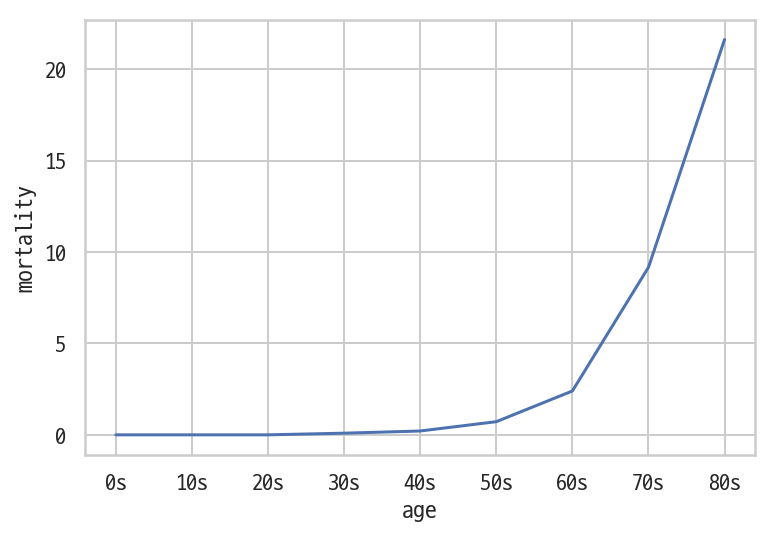

In [28]:
sns.lineplot(data=last_timeage, x='age', y='mortality')
plt.show()

- 80대로 올라갈수록 치사율이 급격하게 높아진다

## 5. 나이대 별 확진자 및 완치 비율은 어떨까?

#### (1) `state`가 `released`인 데이터를 모아보자

In [32]:
released = patient_info[patient_info["state"] == "released"]
print(released.shape)
released.head()

(1439, 19)


,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,count
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released,1
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released,1
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released,1
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released,1
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released,1


#### (2) 위 데이터를 `age`로 묶어서 몇 명인지 세보자

In [33]:
release_count = released.groupby('age').sum()
release_count['release_count'] = release_count["count"]
release_count

,patient_id,global_num,birth_year,infection_order,infected_by,contact_number,count,release_count
age,,,,,,,,
0s,100191002479,29349.0,40310.0,161.0,5.194100e+10,14.0,23,23
10s,285634010055,145776.0,110237.0,455.0,4.640000e+10,111.0,65,65
20s,1771629059968,1240208.0,682621.0,2801.0,1.218210e+11,1757.0,404,404
30s,718404018685,488048.0,321608.0,1373.0,1.478900e+11,1300.0,200,200
40s,896986025515,562309.0,381206.0,1557.0,2.350020e+11,2059.0,225,225
50s,1173890036743,745513.0,473766.0,1878.0,1.532570e+11,970.0,273,273
60s,662282018226,318764.0,254288.0,996.0,1.086730e+11,297.0,144,144
70s,217979009072,145516.0,101204.0,378.0,3.840900e+10,63.0,56,56
80s,160860008324,138532.0,60019.0,233.0,1.670900e+10,153.0,34,34


#### (3) 나이대 별 완치자 수를 그래프로 그려보자
- 그래프의 x축 순서를 `order` 인자로 직접 넣어주자

In [34]:
sorted(released["age"].unique()[:-1])

['0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']

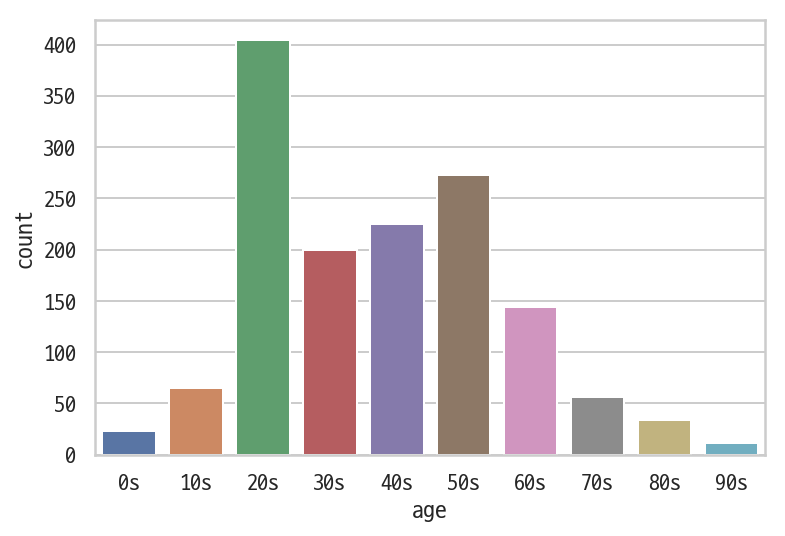

In [35]:
sns.countplot(data=released, x='age', 
              order=['0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s'])
plt.show()

- 20대가 가장 많다!
- 하지만 이는 절대적인 완치자 수이므로, 우리는 '확진자 수 대비 완치자 수'라는 수치인 '완치율'을 확인해 볼 필요가 있다

#### (4) 확진자 수 : 확진 된 사람들의 연령 별 분포도 확인하기 위해 전체 데이터인 `patient_info`를 `age`로 묶어서 `confirm_count`로 저장하자

In [36]:
confirm_count = patient_info.groupby('age').sum()
confirm_count["confirm_count"] = confirm_count["count"]
confirm_count

,patient_id,global_num,birth_year,infection_order,infected_by,contact_number,count,confirm_count
age,,,,,,,,
0s,152302008664,191092.0,88673.0,329.0,6.494100e+10,18.0,47,47
100s,6001000503,7739.0,1916.0,7.0,0.000000e+00,0.0,1,1
10s,472101024696,532480.0,234507.0,952.0,9.774801e+10,1261.0,136,136
20s,2750682159772,3530073.0,1365081.0,5426.0,2.762720e+11,2112.0,779,779
30s,1205103077597,1921583.0,724738.0,2899.0,2.687030e+11,1586.0,418,418
40s,1480174068525,1695184.0,768414.0,3097.0,4.036530e+11,2368.0,445,445
50s,2035782512829,2471916.0,1024217.0,4035.0,3.937490e+11,1768.0,582,582
60s,1531539375550,1285214.0,680832.0,2717.0,2.733030e+11,1668.0,390,390
70s,780367060027,631379.0,350271.0,1351.0,1.195370e+11,150.0,195,195


#### (4) 완치 된 사람들의 수

In [37]:
release_count['release_count']

age
0s      23
10s     65
20s    404
30s    200
40s    225
50s    273
60s    144
70s     56
80s     34
90s     11
Name: release_count, dtype: int64

#### (5) 확진 된 사람들의 수

In [38]:
confirm_count["confirm_count"]

age
0s       47
100s      1
10s     136
20s     779
30s     418
40s     445
50s     582
60s     390
70s     195
80s     154
90s      45
Name: confirm_count, dtype: int64

#### (6) 위 두 가지 표를 붙여주고 싶다! `concat`으로 붙여주자. 다만, 가로로 붙일 거니까 `axis=1`을 꼭 넣자!

In [39]:
age_count = pd.concat([release_count['release_count'], 
                       confirm_count["confirm_count"]], axis=1).fillna(0).astype('int64')
age_count

,release_count,confirm_count
0s,23,47
10s,65,136
20s,404,779
30s,200,418
40s,225,445
50s,273,582
60s,144,390
70s,56,195
80s,34,154
90s,11,45


#### (7) 완치율이라는 `release_rate`를 만들어주자

In [40]:
age_count["release_rate"] = round(age_count["release_count"] / age_count["confirm_count"] * 100, 2)
age_count

,release_count,confirm_count,release_rate
0s,23,47,48.94
10s,65,136,47.79
20s,404,779,51.86
30s,200,418,47.85
40s,225,445,50.56
50s,273,582,46.91
60s,144,390,36.92
70s,56,195,28.72
80s,34,154,22.08
90s,11,45,24.44


#### (8) 그래프를 그려보자

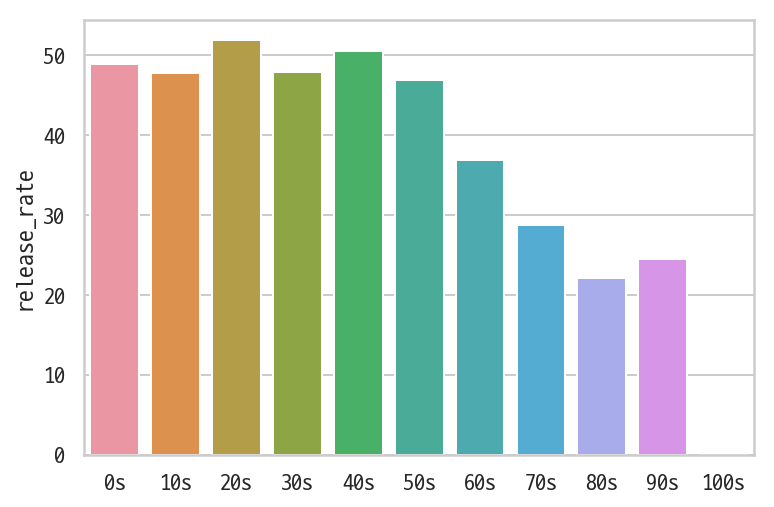

In [41]:
sns.barplot(data=age_count, x=age_count.index, y='release_rate')
plt.show()

- 완치율은 0s~50s 까지 크게 변화가 없다가, 60s부터 급격히 감소한다. 특히 80s 이상은 완치율이 20% 언저리로 매우 낮다. ㅠㅠ